In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure3/"

In [3]:
#load the energy of stability data 
RescuableEnergy_data = pd.read_csv(readdata_dir + "EnergyCalculationVariants/unfitRescuableEnergy.tsv",
                                   sep = "\t")
NonrescuableEnergy_data = pd.read_csv(readdata_dir + "EnergyCalculationVariants/unfitNonRescuableEnergy.tsv",
                                     sep = "\t")
#concat these twol files
ifRes_list = [1]*RescuableEnergy_data.shape[0]
ifRes_list.extend([0]*NonrescuableEnergy_data.shape[0])

In [4]:
#load the rescuability data and merge with AllSub_data 
energy_list = list(RescuableEnergy_data["ddG_foldOpt"].values)
energy_list.extend(NonrescuableEnergy_data["ddG_foldOpt"].values)

subN_list = list(RescuableEnergy_data["dist_Scer"].values)
subN_list.extend(NonrescuableEnergy_data["dist_Scer"].values)
#make the dataframe
allData = pd.DataFrame({"energy":energy_list,
                       "subN":subN_list,
                       "if_res":ifRes_list})
allData

,energy,subN,if_res
0,26.41,9,1
1,37.59,5,1
2,9.93,9,1
3,29.88,5,1
4,38.12,7,1
...,...,...,...
2414,88.07,7,0
2415,104.60,7,0
2416,97.10,7,0
2417,108.28,7,0


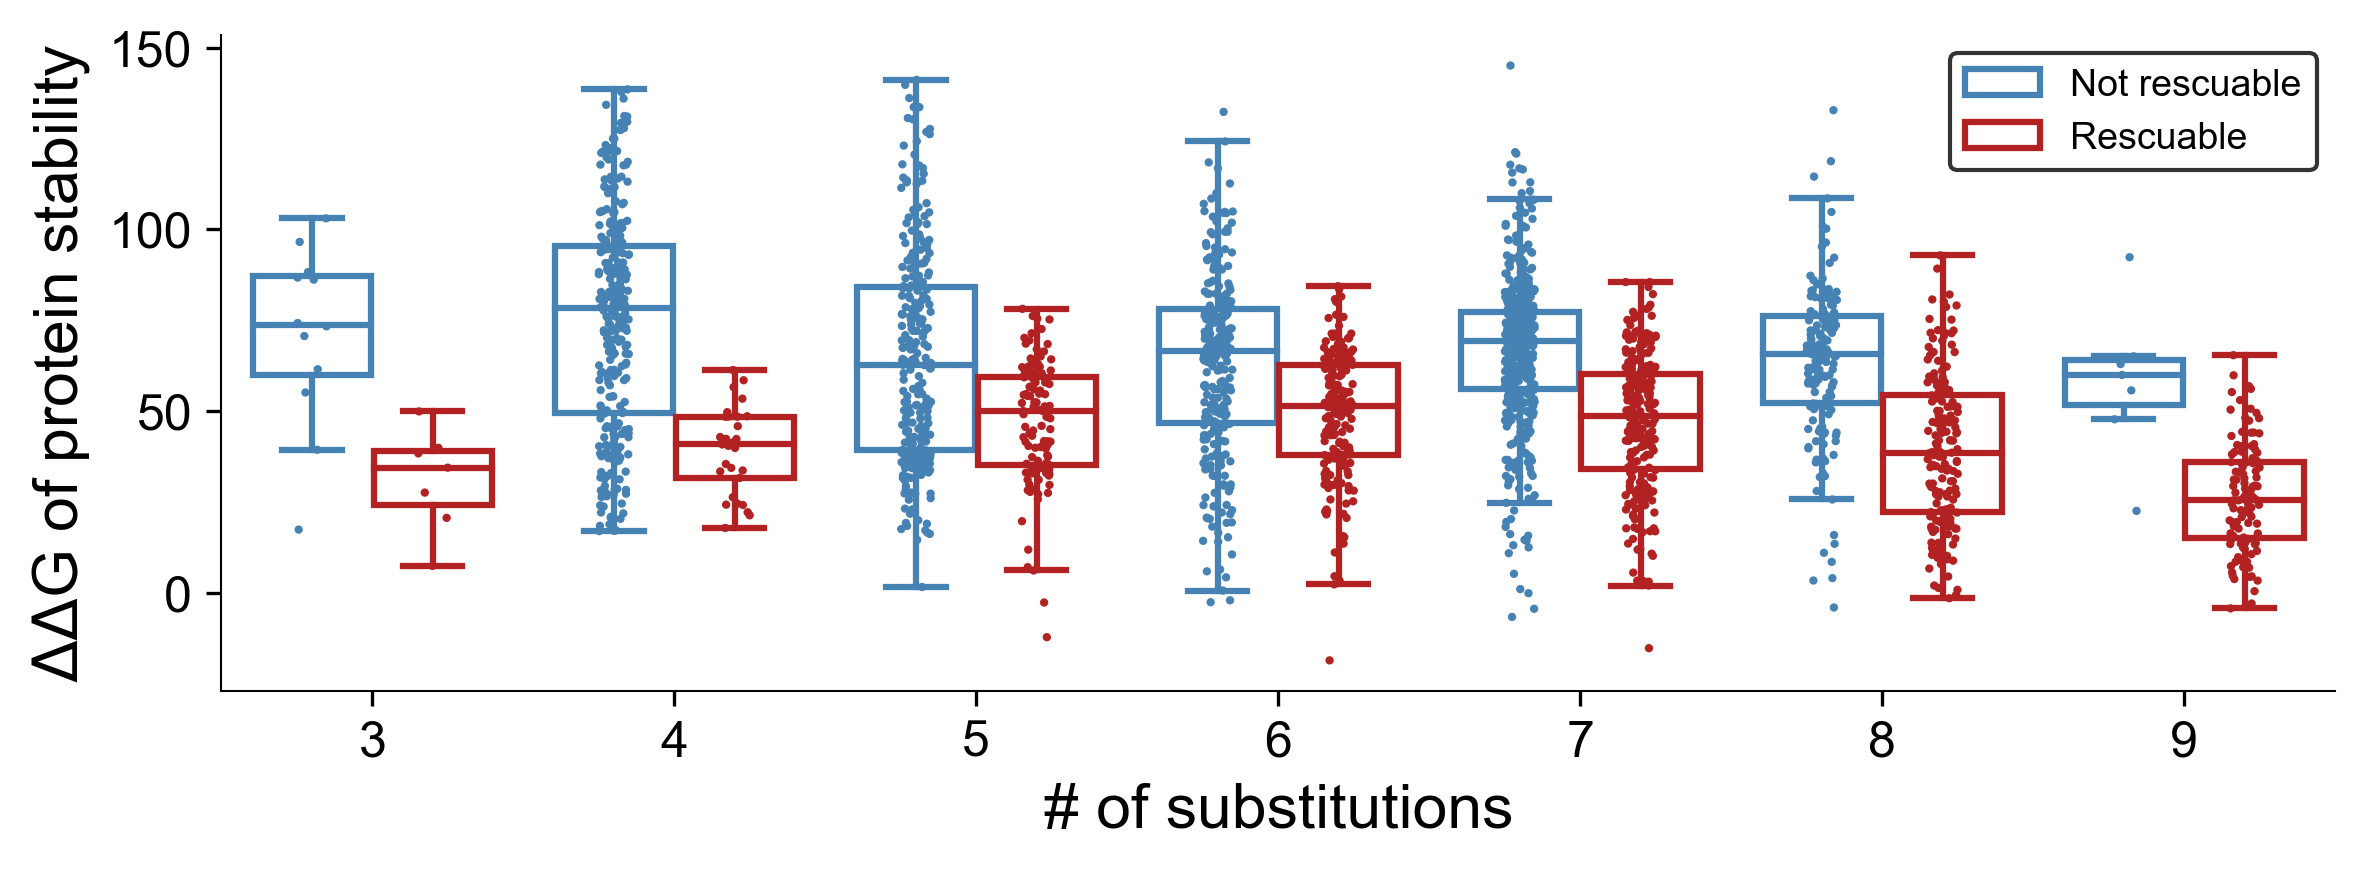

In [17]:
#using sns to group these two different groups and make the U test
import seaborn as sns
#only keep subN from 3-9
allData_plot  = allData[(allData["subN"] <=9 ) & ( allData["subN"] >=3 )]
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8,3))
ax = plt.subplot(111)
#set the platelle color of my own
colorsList = ["steelblue","firebrick"]
Mycolors = sns.set_palette(colorsList)
sns.boxplot(x = "subN",y = "energy",hue = "if_res", data = allData_plot, fliersize=0,
           linewidth=1.5, ax = ax,  palette = Mycolors)

plt.setp(ax.artists, facecolor='w')#make each box has white facecolor

color_map = {
             0:"steelblue",   1:"firebrick",
             2:"steelblue",   3:"firebrick",
             4:"steelblue",   5:"firebrick",
             6:"steelblue",   7:"firebrick",
             8:"steelblue",   9:"firebrick",
            10:"steelblue",  11:"firebrick",
            12:"steelblue",  13:"firebrick"
            }
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    color = color_map[i]
    artist.set_edgecolor(color)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(color)
        

#add the strippoints
sns.stripplot(x = "subN",y = "energy",hue = "if_res", data = allData_plot, 
              dodge = True, size = 2,  linewidth = 0)

#set the legend color and labels
legend  = ax.legend(handles = [ax.artists[0], ax.artists[1]], labels = ["Not rescuable","Rescuable"],
                    edgecolor='k', fontsize=9 )   
legend = legend.get_frame().set_linewidth(1.0)

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("# of substitutions",fontsize = 15)
plt.ylabel(r'$\Delta$$\Delta$G of protein stability',fontsize = 15)
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "EnergyRescuableOrNot.png", dpi = 300)

In [30]:
#cycle the number of substitutions and use U test to get the p-value
for subN in range(3,10):
    allData_single = allData[allData["subN"] == subN]
    print(stats.mannwhitneyu(allData_single[allData_single["if_res"] == 0]["energy"].values,
                            allData_single[allData_single["if_res"] == 1]["energy"].values))
    

MannwhitneyuResult(statistic=8.0, pvalue=0.0023182017864522724)
MannwhitneyuResult(statistic=1372.5, pvalue=1.679333860885791e-09)
MannwhitneyuResult(statistic=9461.5, pvalue=2.949025064491056e-07)
MannwhitneyuResult(statistic=14540.0, pvalue=4.60660721552905e-11)
MannwhitneyuResult(statistic=26510.5, pvalue=6.694977167215628e-36)
MannwhitneyuResult(statistic=5540.0, pvalue=5.078002189700993e-22)
MannwhitneyuResult(statistic=85.0, pvalue=0.00024169943079133487)


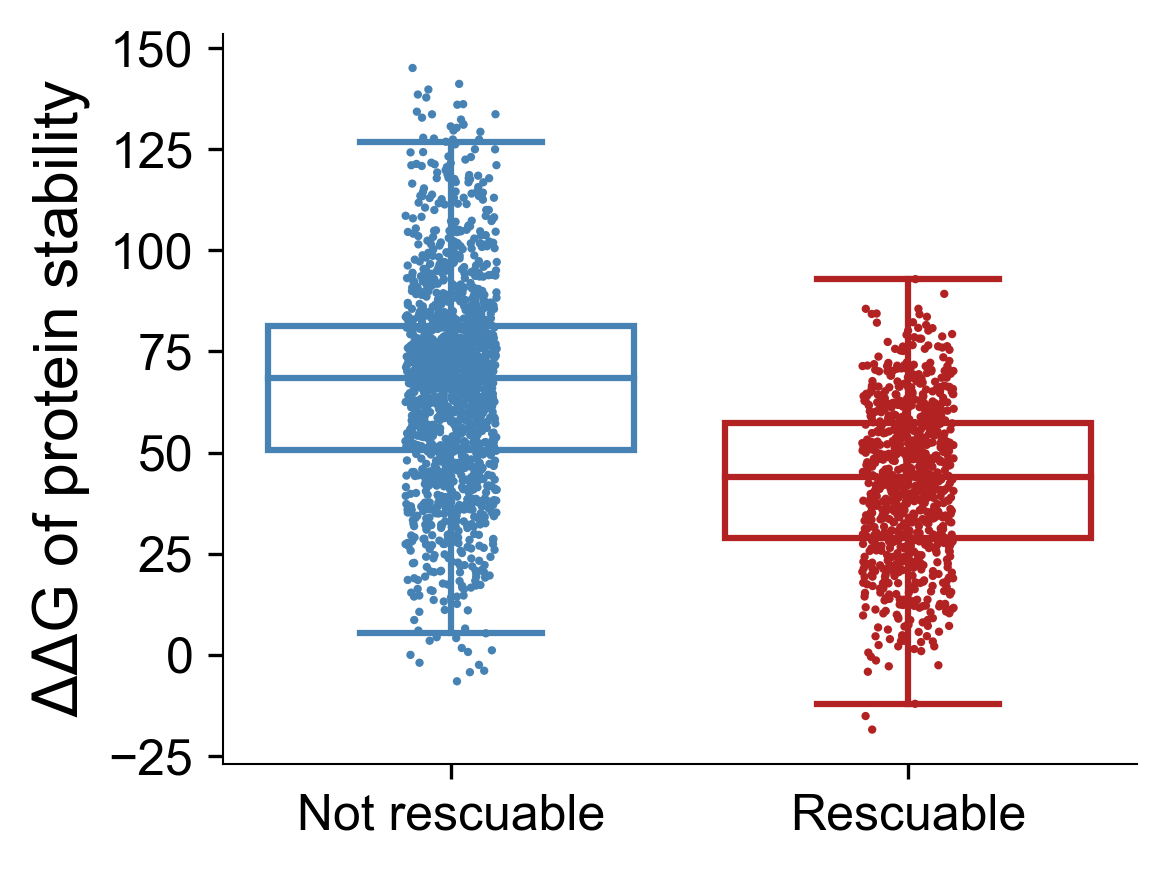

In [23]:
#using sns to group these two different groups and make the U test
import seaborn as sns
#only keep subN from 3-9
allData_plot  = allData[(allData["subN"] <=9 ) & ( allData["subN"] >=3 )]
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(4,3))
ax = plt.subplot(111)
#set the platelle color of my own
colorsList = ["steelblue","firebrick"]
Mycolors = sns.set_palette(colorsList)
sns.boxplot(x = "if_res",y = "energy", data = allData_plot, fliersize=0,
           linewidth=1.5, ax = ax,  palette = Mycolors)

plt.setp(ax.artists, facecolor='w')#make each box has white facecolor

color_map = {
             0:"steelblue",   1:"firebrick",
             2:"steelblue",   3:"firebrick",
             4:"steelblue",   5:"firebrick",
             6:"steelblue",   7:"firebrick",
             8:"steelblue",   9:"firebrick",
            10:"steelblue",  11:"firebrick",
            12:"steelblue",  13:"firebrick"
            }
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    color = color_map[i]
    artist.set_edgecolor(color)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(color)
        

#add the strippoints
sns.stripplot(x = "if_res",y = "energy", data = allData_plot, 
              dodge = True, size = 2,  linewidth = 0)

#set the legend color and labels
# legend  = ax.legend(handles = [ax.artists[0], ax.artists[1]], labels = ["Not rescuable","Rescuable"],
#                     edgecolor='k', fontsize=9 )   
# legend = legend.get_frame().set_linewidth(1.0)

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel(None)
plt.xticks([0,1],["Not rescuable","Rescuable"])
plt.ylabel(r'$\Delta$$\Delta$G of protein stability',fontsize = 15)
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "EnergyRescuableOrNot_comb.png", dpi = 300)

In [31]:
#use U test to get the p-value
print(stats.mannwhitneyu(allData[allData["if_res"] == 0]["energy"].values,
                            allData[allData["if_res"] == 1]["energy"].values))    

MannwhitneyuResult(statistic=291001.0, pvalue=3.758158530540567e-128)


In [120]:
#compare the stability of protein structure for rescuing and rescuable geotypes 
rescuableData = pd.read_csv(readdata_dir + "EnergyCalculationVariants/unfitRescuableEnergy.tsv",
                          sep  = "\t")
rescuingData = pd.read_csv(readdata_dir + "EnergyCalculationVariants/RescuingEnergy.tsv",
                           sep = "\t")
#merge these two files 
mergeData = pd.merge(rescuingData,rescuableData, left_on=["subsetMutList"],
        right_on=["mut_list"])
mergeData_keep = mergeData[mergeData["ddG_foldOpt_x"]<100]

In [116]:
#plot the results
import matplotlib as mpl
from scipy.stats import gaussian_kde

def reverse_colourmap(cmap, name = 'my_cmap_r'):  
    reverse = []
    k = []   
    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []
        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

my_cmap = reverse_colourmap(mpl.cm.RdBu)

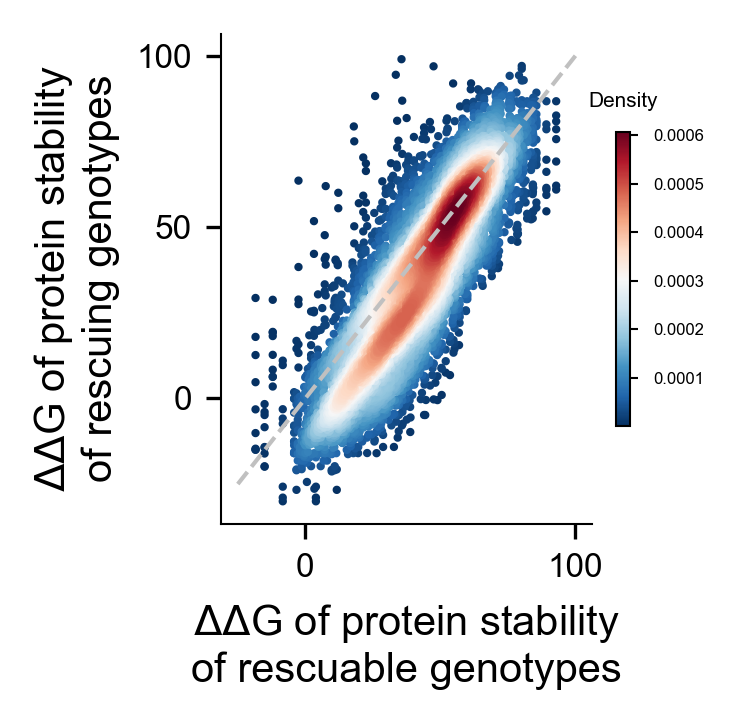

In [156]:
x = mergeData_keep["ddG_foldOpt_y"].values
y = mergeData_keep["ddG_foldOpt_x"].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x, y, c=z,s=1.0,cmap=
            my_cmap)

plt.plot([-25,100],[-25,100],linewidth = 1,linestyle = "--",color  = "silver")
#plt.text(95,100,"y=x")

#ereaser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xlabel(r'$\Delta$$\Delta$G' + " of protein stability\nof rescuable genotypes")
plt.ylabel(r'$\Delta$$\Delta$G' + " of protein stability\nof rescuing genotypes")

#add the density of colorbar index
cbar =plt.colorbar(shrink=0.6)
cbar.ax.set_title('Density', fontsize=5)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=4,length=2,width=0.5)
cbar.outline.set_linewidth(0.5)

#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "EnergyRescuingVSRescuable.png", dpi = 300)

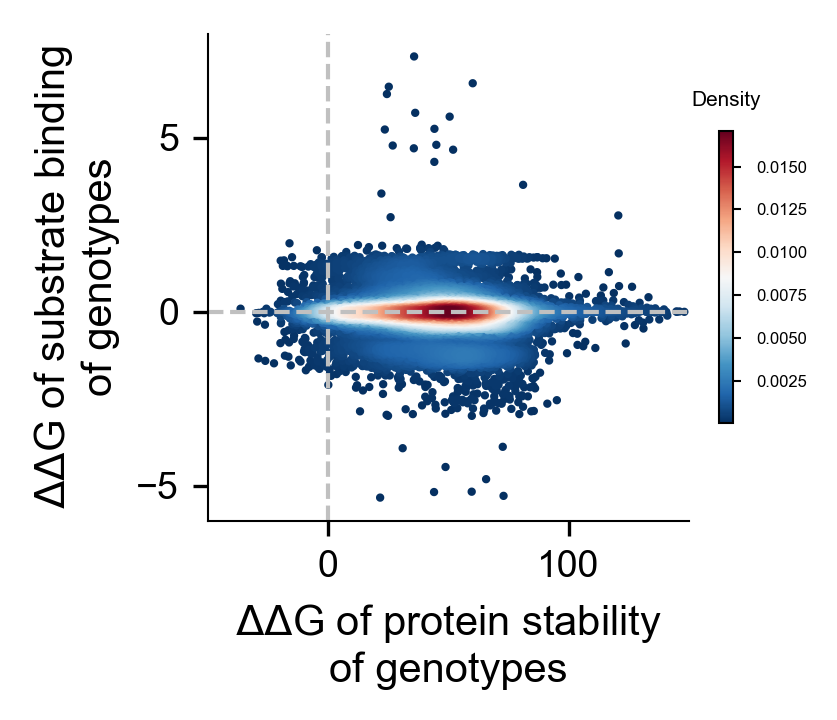

In [157]:
#most substitutions have effect on the stability of structure rather than substrate binding 
#load the whole data 
allSubData = pd.read_csv(readdata_dir + "EnergyCalculationVariants/AllSubNEnergy.tsv", sep = "\t")
allSubData["ddG_binding"] = allSubData["ddG_fold"].values - allSubData["ddG_bind"].values 
#plot it !
x = allSubData["ddG_foldOpt"].values
y = allSubData["ddG_binding"].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
plt.figure(figsize=(3,2.5))
ax = plt.subplot(111)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x, y, c=z,s=1.0,cmap=
            my_cmap)

#ereaser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

#add two vline and hline in value == 0
plt.vlines(0,ymin = -6,ymax = 8, linestyles = "--", color = "silver", linewidth = 1)
plt.hlines(0,xmin = -50,xmax = 150, linestyles = "--", color = "silver", linewidth = 1)
plt.xlim([-50,150])
plt.ylim([-6,8])

plt.xlabel(r'$\Delta$$\Delta$G of' +  " protein stability\nof genotypes")
plt.ylabel(r'$\Delta$$\Delta$G of' + " substrate binding\nof genotypes")

#add the density of colorbar index
cbar =plt.colorbar(shrink=0.6)
cbar.ax.set_title('Density', fontsize=5)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=4,length=2,width=0.5)
cbar.outline.set_linewidth(0.5)

#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "EnergyOfSubstrateVSStructure.png",dpi = 300)

In [11]:
#show that substitutions in interface regions, can increase the  binding energy and also increase the protein stability!
interface_bindData = pd.read_csv(readdata_dir + "EnergyCalculationVariants/InterfaceBindingEnergy_rescuableOrNot.tsv", sep = "\t")
interface_bindData

,mutList,interfaceRatio,dist_Scer,ddG_binding,ifRescuable
0,137D:139A:140F:143A:144N:157S:161T:163I,62.500000,8,1.512000,1
1,137D:139A:140F:143A:144N:157S:161T:163V,62.500000,8,0.938333,0
2,137D:139A:140F:144N:157S:161T,83.333333,6,1.310667,1
3,139A:140F:141G:142F:144K:157S:161T:163V,75.000000,8,1.525667,0
4,139A:140F:141S:142F:143I:161T:163I,57.142857,7,0.448333,0
...,...,...,...,...,...
179,98L:99S:119P:121Y:122C,80.000000,5,1.939000,0
180,98L:99T:117Y:119P:121Y,80.000000,5,1.645000,0
181,98L:99T:117Y:119P:121Y:122C,83.333333,6,1.998000,0
182,98L:99T:119P:121Y,75.000000,4,1.293333,0


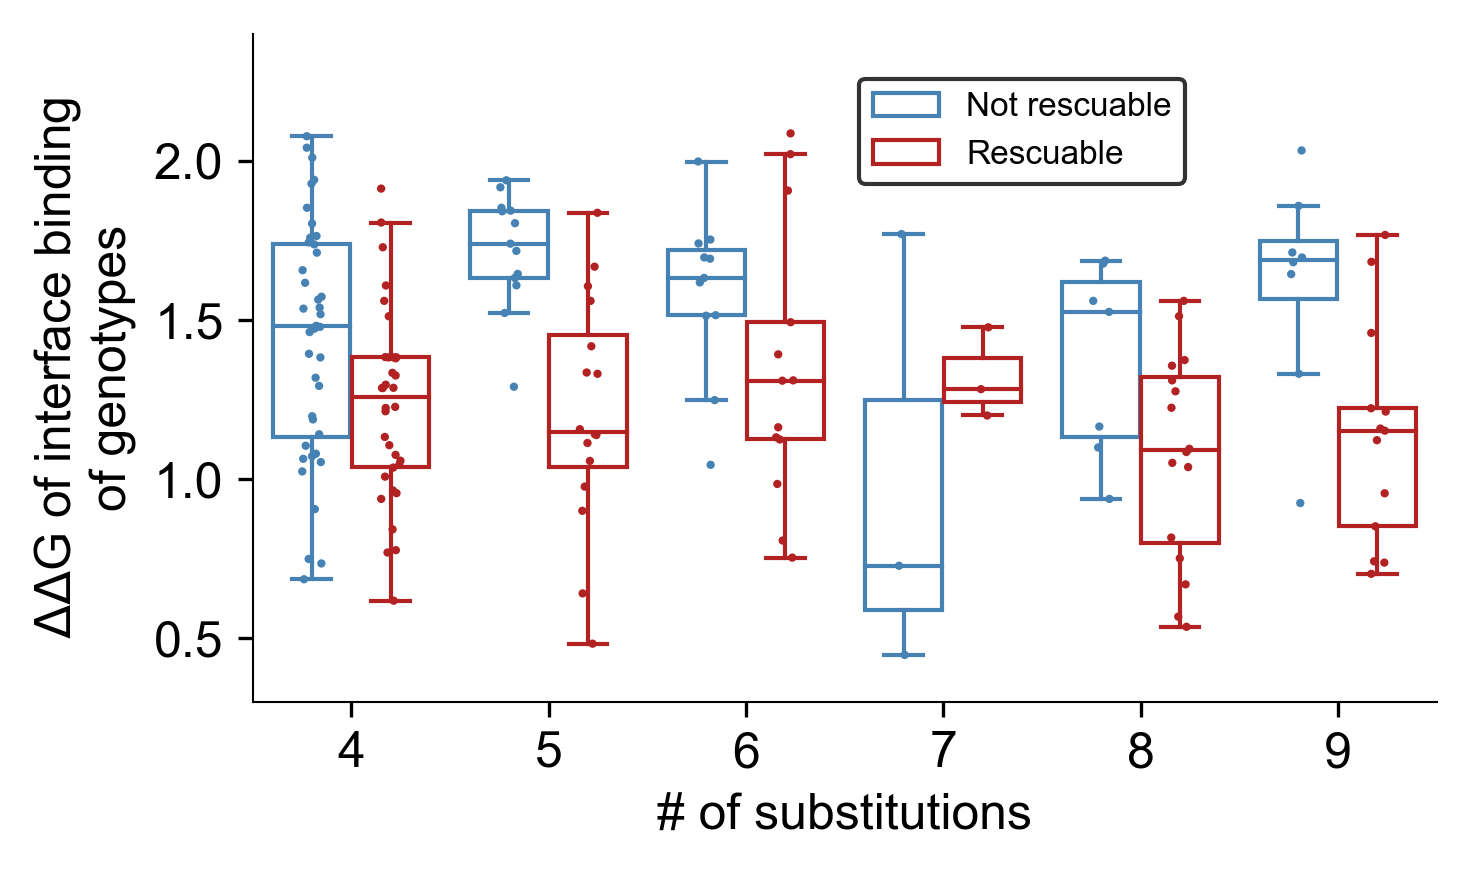

In [19]:
interface_bindDataKeep = interface_bindData[(interface_bindData["dist_Scer"] >= 4) &  (interface_bindData["dist_Scer"] <= 9)]
plt.figure(figsize=(5,3))
ax = plt.subplot(111)
sns.boxplot(x = "dist_Scer",y = "ddG_binding",hue = "ifRescuable", data = interface_bindDataKeep, fliersize=0,
           linewidth=1.0, ax = ax,  palette = Mycolors)
plt.setp(ax.artists, facecolor='w')#make each box has white facecolor

color_map = {
             0:"steelblue",   1:"firebrick",
             2:"steelblue",   3:"firebrick",
             4:"steelblue",   5:"firebrick",
             6:"steelblue",   7:"firebrick",
             8:"steelblue",   9:"firebrick",
            10:"steelblue",  11:"firebrick",
          
            }
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    color = color_map[i]
    artist.set_edgecolor(color)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(color)
        

#add the strippoints
sns.stripplot(x = "dist_Scer",y = "ddG_binding",hue = "ifRescuable", data = interface_bindDataKeep, 
              dodge = True, size = 2,  linewidth = 0)

#set the legend color and labels
legend  = ax.legend(handles = [ax.artists[0], ax.artists[1]], labels = ["Not rescuable","Rescuable"],
                    edgecolor='k', fontsize=8,loc = "best",bbox_to_anchor=(0.65, 0.75) )   
legend = legend.get_frame().set_linewidth(1.0)

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("# of substitutions",fontsize = 12)
plt.ylabel(r'$\Delta$$\Delta$G of interface binding'+"\nof genotypes",fontsize = 12)
plt.ylim([0.3,2.4])
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "BindingEnergyRescuableOrNot.png", dpi = 300)

In [28]:
#using  U test to calculate the p-value of difference
for subN in range(4,10):
    allData_single = interface_bindDataKeep[interface_bindDataKeep["dist_Scer"] == subN]
    print(stats.mannwhitneyu(allData_single[allData_single["ifRescuable"] == 0]["ddG_binding"].values,
                            allData_single[allData_single["ifRescuable"] == 1]["ddG_binding"].values))

MannwhitneyuResult(statistic=438.0, pvalue=0.004402522159000567)
MannwhitneyuResult(statistic=20.0, pvalue=0.00012526514952546376)
MannwhitneyuResult(statistic=43.0, pvalue=0.05237777368232185)
MannwhitneyuResult(statistic=3.0, pvalue=0.3312602917700287)
MannwhitneyuResult(statistic=26.5, pvalue=0.02630411826000905)
MannwhitneyuResult(statistic=18.0, pvalue=0.0076311822273450215)


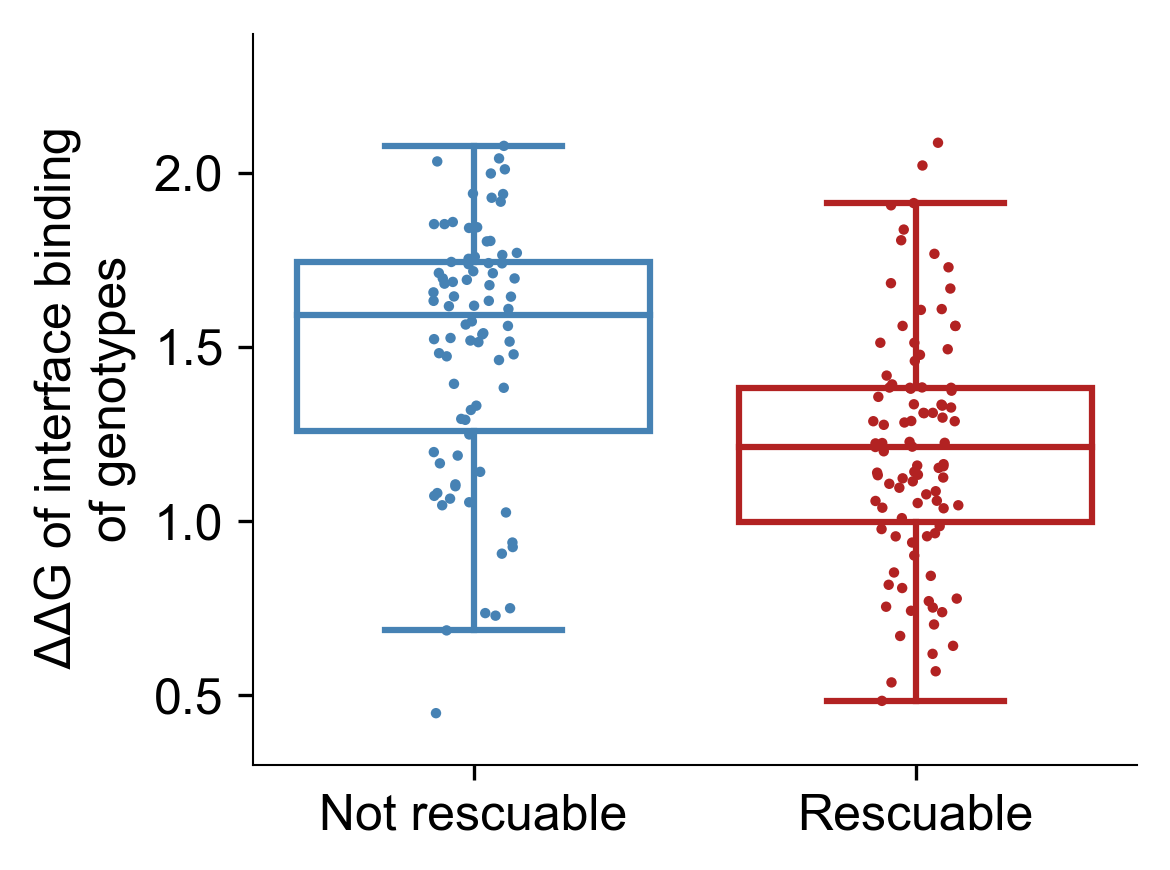

In [26]:
interface_bindDataKeep = interface_bindData[(interface_bindData["dist_Scer"] >= 4) &  (interface_bindData["dist_Scer"] <= 9)]
plt.figure(figsize=(4,3))
ax = plt.subplot(111)
sns.boxplot(x = "ifRescuable",y = "ddG_binding", data = interface_bindDataKeep, fliersize=0,
           linewidth=1.5, ax = ax,  palette = Mycolors)
plt.setp(ax.artists, facecolor='w')#make each box has white facecolor

color_map = {
             0:"steelblue",   1:"firebrick",
             2:"steelblue",   3:"firebrick",
             4:"steelblue",   5:"firebrick",
             6:"steelblue",   7:"firebrick",
             8:"steelblue",   9:"firebrick",
            10:"steelblue",  11:"firebrick",
          
            }
for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    color = color_map[i]
    artist.set_edgecolor(color)
    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(color)
        

#add the strippoints
sns.stripplot(x = "ifRescuable",y = "ddG_binding", data = interface_bindDataKeep, 
              dodge = True, size = 2.5,  linewidth = 0)

#set the legend color and labels
# legend  = ax.legend(handles = [ax.artists[0], ax.artists[1]], labels = ["Not rescuable","Rescuable"], 
#                     edgecolor='k', fontsize=8,loc = "best",bbox_to_anchor=(0.65, 0.75) )   
# legend = legend.get_frame().set_linewidth(1.0)

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.xlabel(None)
plt.xticks([0,1],["Not rescuable","Rescuable"])

plt.ylabel(r'$\Delta$$\Delta$G of interface binding'+"\nof genotypes",fontsize = 12)
plt.ylim([0.3, 2.4])
#save the figure
plt.tight_layout()
plt.savefig(savedata_dir + "BindingEnergyRescuableOrNot_comb.png", dpi = 300)

In [29]:
#using  U test to calculate the p-value of difference
print(stats.mannwhitneyu(interface_bindDataKeep[interface_bindDataKeep["ifRescuable"] == 0]["ddG_binding"].values,
                            interface_bindDataKeep[interface_bindDataKeep["ifRescuable"] == 1]["ddG_binding"].values))

MannwhitneyuResult(statistic=2093.0, pvalue=5.79973024299129e-08)


In [197]:
#compare the binding energy of rescuing and rescuable genotypes 
bindEnergy_rescuingData = pd.read_csv(readdata_dir + "EnergyCalculationVariants/InterfaceBindingEnergy_rescuingOrNot.tsv",
                          sep  = "\t")
bindEnergy_rescuingData

,ddG_bindingRescuing,ddG_bindingRescuable,mutList_rescuing,mutList_rescuable,rescuing_fitness
0,-0.264520,0.724000,137G:139A:140F:141C:142F:143A:144N:157T:161T:163V,137D:139A:140F:144N:157S:161T,1.021135
1,-0.209811,0.724000,137G:139A:140F:141C:142F:143A:144N:157T:160V:1...,137D:139A:140F:144N:157S:161T,0.896725
2,-0.303570,0.834333,181C:183N:189A:202A:203S:206L:207T:209K:211E,139A:140F:142F:143I:144K:157S:161T:163I,0.923753
3,-0.690117,0.834333,181C:183N:189A:202A:203S:206L:207T:209K:210D:211E,139A:140F:142F:143I:144K:157S:161T:163I,0.757777
4,-0.822012,0.834333,181C:183N:189A:202A:203S:206L:207T:208E:209K:211E,139A:140F:142F:143I:144K:157S:161T:163I,0.609180
...,...,...,...,...,...
75,-0.579146,0.475000,66Y:67T:86F:87V:93I,181H:183N:201K:202A:203S:206L:209K:211E,0.721152
76,0.279140,0.475000,66Y:67T:86F:87V:93V,181H:183N:201K:202A:203S:206L:209K:211E,0.907139
77,-0.307137,0.652667,66N:67T:86F:87V:93V,181C:183N:202A:203S:206L:207T:209K:211E,0.848519
78,-0.025526,0.652667,66N:67T:73A:86F:87V,181C:183N:202A:203S:206L:207T:209K:211E,0.875266


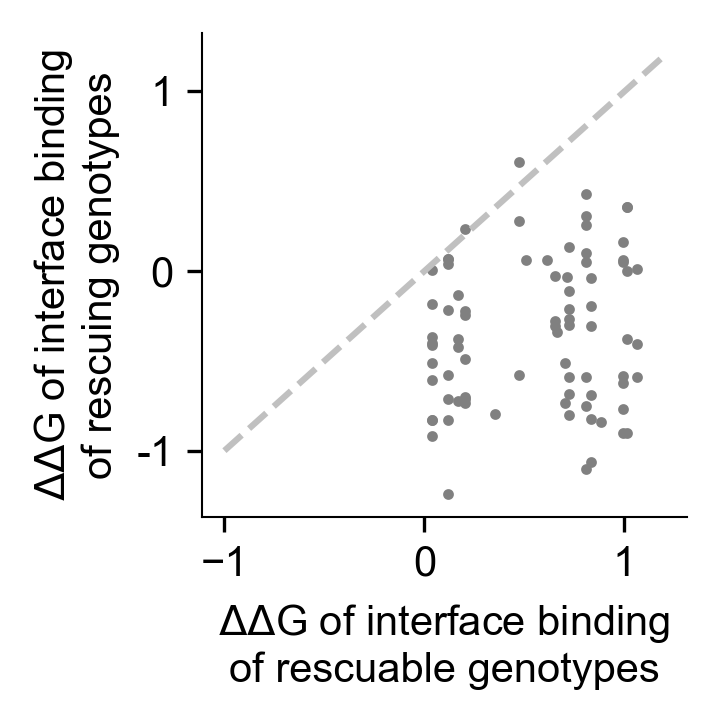

In [209]:
plt.figure(figsize=(2.5,2.5))
ax = plt.subplot(111)
plt.scatter(bindEnergy_rescuingData["ddG_bindingRescuable"].values, 
            bindEnergy_rescuingData["ddG_bindingRescuing"].values,
             s=2.5,color = "grey")
plt.plot([-1,1.2],[-1,1.2],ls = "--",color = "silver")

#eraser the upper and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
plt.xticks(fontsize = 10)
plt.yticks([-1,0,1],[-1,0,1],fontsize = 10)

plt.xlabel(r'$\Delta$$\Delta$G of' +  " interface binding\nof rescuable genotypes")
plt.ylabel(r'$\Delta$$\Delta$G of' + " interface binding\nof rescuing genotypes")

plt.tight_layout()
plt.savefig(savedata_dir + "BindingEnergyRescuing.png", dpi = 300)

In [33]:
data = pd.read_csv(readdata_dir+ "EnergyCalculationVariants/AllSubNEnergy.tsv",sep ="\t")
data

,mutList,ddG_fold,ddG_foldOpt,ddG_bind,fitness,dist_Scer
0,60A:62F:78L:79L:81S:82G,83.32,83.38,83.33,0.000000,6.0
1,140F:141G:143I:144N:157S:160V:163V,45.44,47.19,45.42,0.787526,7.0
2,13Q:16N:18S:26A:27H:29E,33.63,33.43,33.64,0.841746,6.0
3,137D:140F:141S:143I:144N:161T,28.00,28.19,29.19,1.016704,6.0
4,181C:202A:203S:204I:205T:206L:208E:209K:210D,25.69,26.41,24.09,0.000000,9.0
...,...,...,...,...,...,...
10614,96S:97A:98L:99S:102M:104L:105H:117Y:119H:120A:...,50.21,50.36,50.32,0.000000,12.0
10615,137S:140F:141C:142F:143I:144N:157T:161T:163I,30.40,26.64,28.83,0.647674,9.0
10616,137S:141S:142F:143A:144D:157S:163I,68.47,68.02,68.54,0.000000,7.0
10617,137D:139A:141C:143A:144N:157S:161T:163V,49.41,46.90,49.82,0.683266,8.0
